<a href="https://colab.research.google.com/github/TanusreeAdhikari/IEA-Global-EV-Data/blob/main/IEA_Global_EV_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [40]:
# Load the dataset
file_path = 'IEA Global EV Data 2024.csv'
data = pd.read_csv(file_path)

In [16]:
# Filter the dataset for 'EV stock' for Cars in a specific region (e.g., Australia)
filtered_data = data[(data['parameter'] == 'EV stock') & (data['mode'] == 'Cars') & (data['region'] == 'Australia')]

In [17]:
# Features and target
X = filtered_data[['year']]  # Using 'year' as the predictor
y = filtered_data['value']   # 'value' as the target (EV stock)

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions
y_pred = linear_model.predict(X_test)


In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 56951751.94912652
R-squared Score: 0.730527664959431


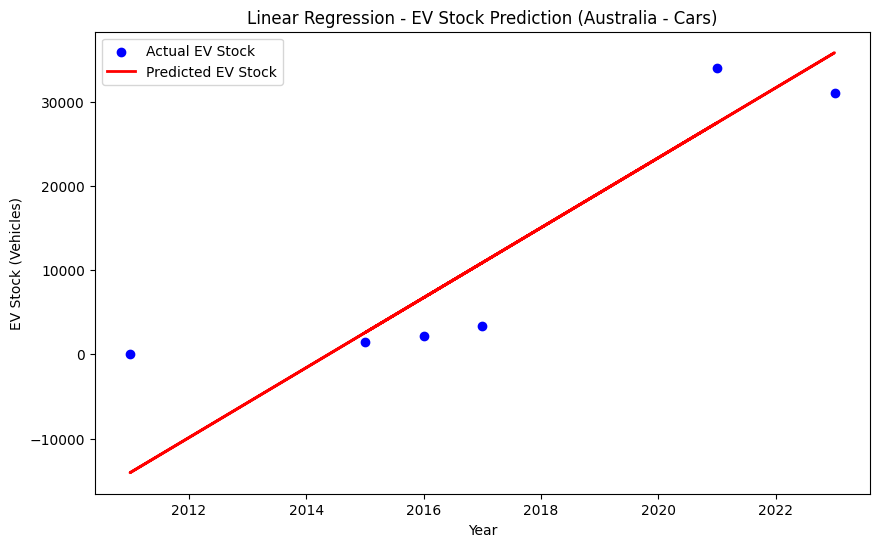

In [22]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual EV Stock')
plt.plot(X_test, y_pred, color='red', label='Predicted EV Stock', linewidth=2)
plt.title('Linear Regression - EV Stock Prediction (Australia - Cars)')
plt.xlabel('Year')
plt.ylabel('EV Stock (Vehicles)')
plt.legend()
plt.show()

In [23]:
# Sort the data by year to maintain sequential order
filtered_data = filtered_data.sort_values(by='year')

In [24]:
# Prepare features and target
X = filtered_data[['year']].values  # Using 'year' as the independent variable
y = filtered_data['value'].values   # 'value' as the dependent variable (EV stock)

In [25]:
# Normalize the data to improve training efficiency
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [26]:
# Reshape the data for LSTM model [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [27]:
# Split data into training and test sets (80% training, 20% testing)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]


In [31]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=25, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for the final prediction


In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0048 - val_loss: 0.2135
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - loss: 0.0045 - val_loss: 0.2106
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0042 - val_loss: 0.2079
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0039 - val_loss: 0.2051
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0036 - val_loss: 0.2025
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0034 - val_loss: 0.1999
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0032 - val_loss: 0.1974
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0030 - val_loss: 0.1949
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0029 - val_loss: 0.1926
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0027 - val_loss: 0.1904
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0026 - val_loss: 0.1883
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0025 - val_loss: 0.1863


In [36]:
# Make predictions
y_pred_scaled = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


In [37]:
# Reverse scaling to get actual EV stock values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)


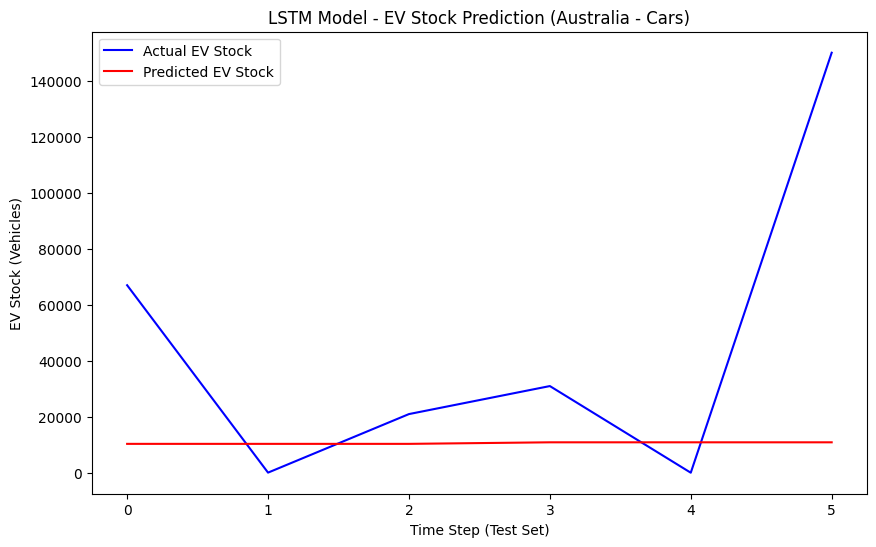

In [38]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, color='blue', label='Actual EV Stock')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted EV Stock')
plt.title('LSTM Model - EV Stock Prediction (Australia - Cars)')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('EV Stock (Vehicles)')
plt.legend()
plt.show()
